In this lab, we will be using data from the famous "Old Faithful geyser" for clustering

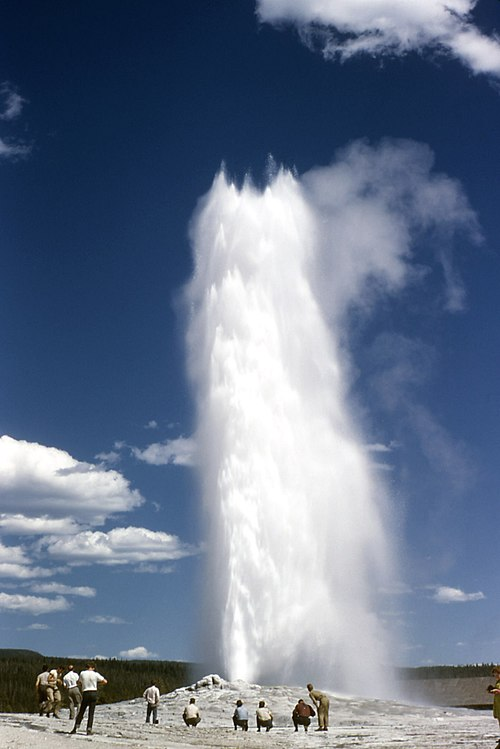


The "old faithful" geyser erupts at regular intervals of time.

We will try to see if can detect any patterns in the eruption time and the duration of eruptions of old faithful

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
oldfaith = pd.read_csv("oldfaithful.csv")

In [4]:
oldfaith.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


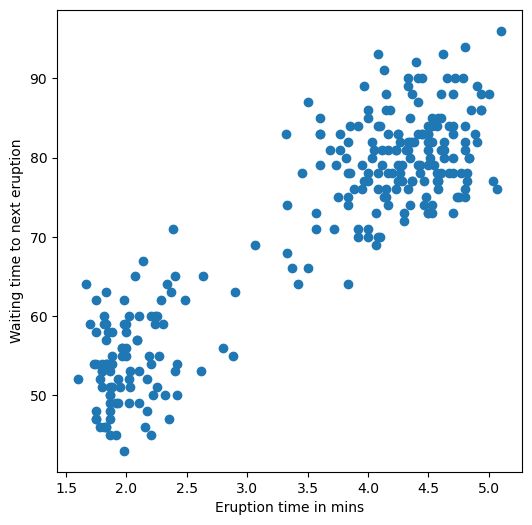

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(oldfaith.TimeEruption, oldfaith.TimeWaiting)
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.show()

In [6]:
# we can see that there are roughly 2 clusters in the data

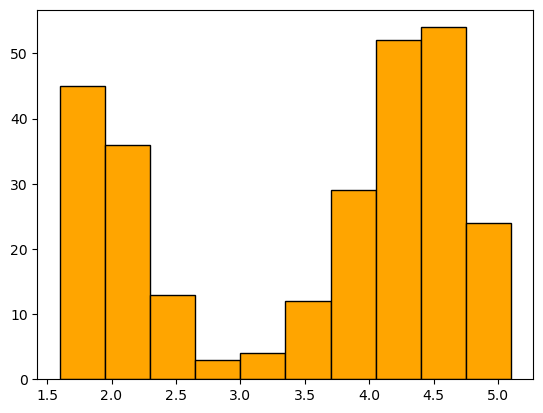

In [7]:
plt.hist(oldfaith.TimeEruption, edgecolor="black",color="orange")
plt.show()

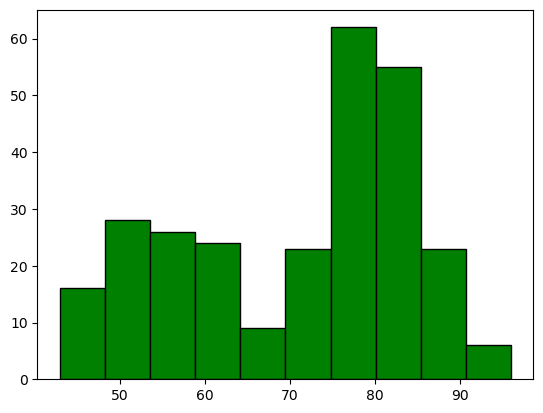

In [8]:
plt.hist(oldfaith.TimeWaiting, edgecolor="black",color="green")
plt.show()

In [9]:
# Lets fit the k means clustering

In [10]:
# Important: Since we are using eucledian distance, its very important to scale the data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Standardize the data
oldfaith_std = StandardScaler().fit_transform(oldfaith)

In [13]:
pd.DataFrame(oldfaith_std).head()


,0,1
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


In [14]:
oldfaith_df = pd.DataFrame(oldfaith_std)
oldfaith_df.rename(columns = {0:"wait",1:"time"})
oldfaith_df.head()

,0,1
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


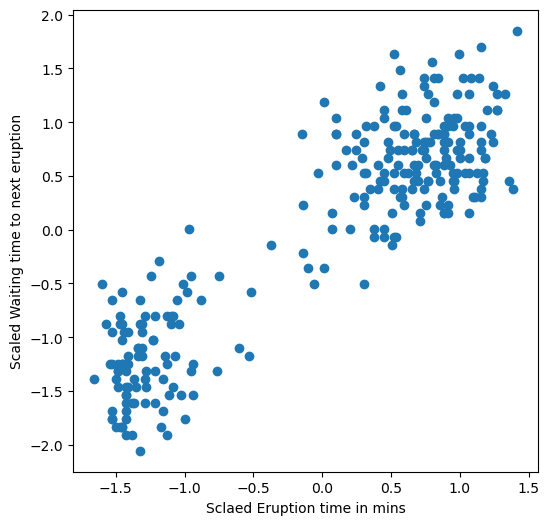

In [15]:
plt.figure(figsize=(6, 6))


plt.scatter(oldfaith_df[0], oldfaith_df[1])
plt.xlabel('Sclaed Eruption time in mins')
plt.ylabel('Scaled Waiting time to next eruption')
plt.show()

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=2, random_state=123)

In [18]:
kmeans.fit(oldfaith_std)
y_kmeans = kmeans.predict(oldfaith_std)

c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [19]:
y_kmeans

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1])

In [20]:
# lets visualize the clusters

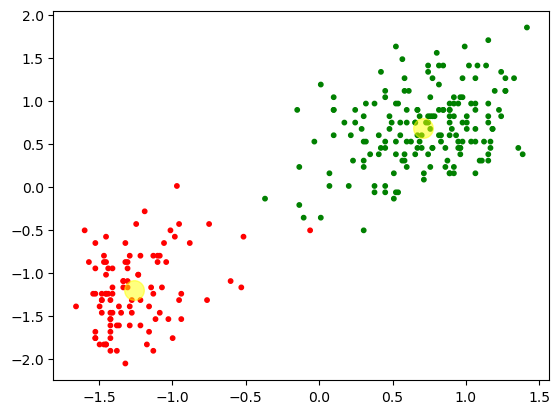

In [21]:
colors = ['red','green']

plt.scatter(oldfaith_std[:, 0], oldfaith_std[:, 1], c=y_kmeans, s=10,cmap = matplotlib.colors.ListedColormap(colors))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha = 0.5);

In [22]:
#inertia is nothing but the within cluster variation 
kmeans.inertia_

79.57595948827702

c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


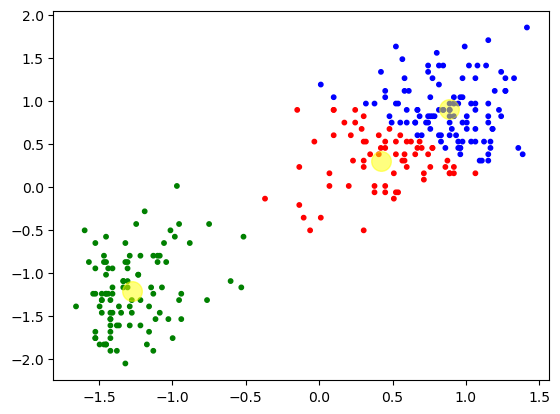

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(oldfaith_std)
y_kmeans = kmeans.predict(oldfaith_std)

colors = ['red','green','blue']

plt.scatter(oldfaith_std[:, 0], oldfaith_std[:, 1], c=y_kmeans, s=10,cmap = matplotlib.colors.ListedColormap(colors))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha = 0.5);


In [24]:
kmeans.inertia_

56.34949369601639

In [25]:
# Creating the elbow plot

c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

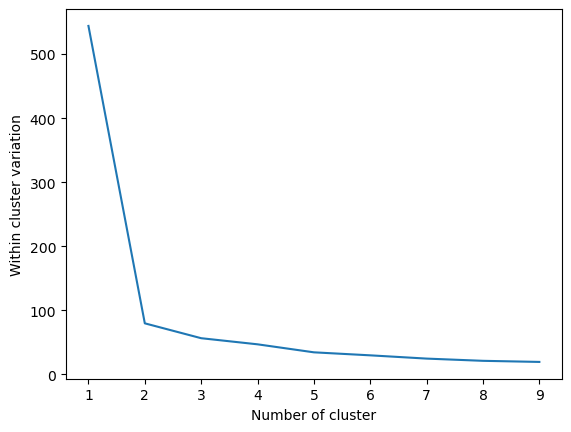

In [26]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(oldfaith_std)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Within cluster variation")
plt.show()

Note: You can also look at this python package that has a function to plot the elbow plot: (and the silhouette score clustering)
        https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [27]:
pip install gapstatistics

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Define the Gap Statistic Calculation Function
import numpy as np

def compute_gap_statistic(X, k_max, n_replicates=10):
    """
    Compute the Gap Statistic for a range of cluster numbers.

    Parameters:
    X: array-like, shape (n_samples, n_features)
        The input data.
    k_max: int
        The maximum number of clusters to evaluate.
    n_replicates: int
        The number of bootstrap samples.

    Returns:
    gap_values: list
        The calculated gap values for each k.
    """
    # Generate reference data from a uniform distribution
    def generate_reference_data(X):
        return np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=X.shape)

    gap_values = []
    
    # Loop over a range of k values (1 to k_max)
    for k in range(1, k_max + 1):
        # Fit KMeans to the original data
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        original_inertia = kmeans.inertia_

        # Compute the average inertia for the reference datasets
        reference_inertia = []
        for _ in range(n_replicates):
            random_data = generate_reference_data(X)
            kmeans.fit(random_data)
            reference_inertia.append(kmeans.inertia_)

        # Calculate the Gap statistic
        gap = np.log(np.mean(reference_inertia)) - np.log(original_inertia)
        gap_values.append(gap)

    return gap_values

c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

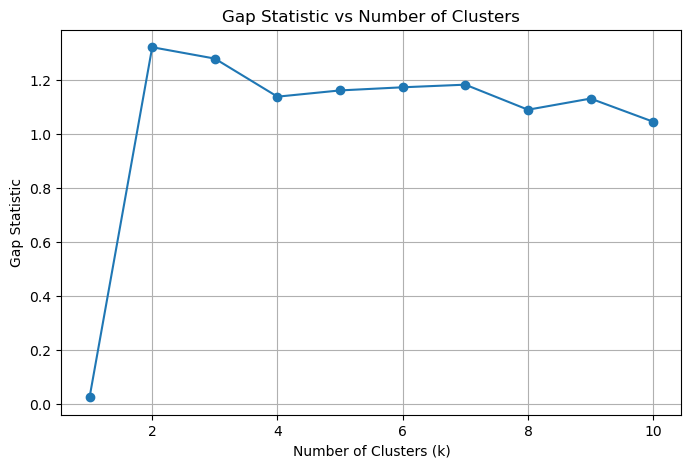

In [50]:
# Calculate Gap Statistic for Different k Values
k_max = 10  # Maximum number of clusters to evaluate
gap_values = compute_gap_statistic(oldfaith_std, k_max)

# Plotting the Gap Statistic
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, k_max + 1), gap_values, marker='o')
plt.title('Gap Statistic vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.grid()
plt.show()

# Limitations of k means

#### 1. k means only works for linear cluster boundaries

In [29]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


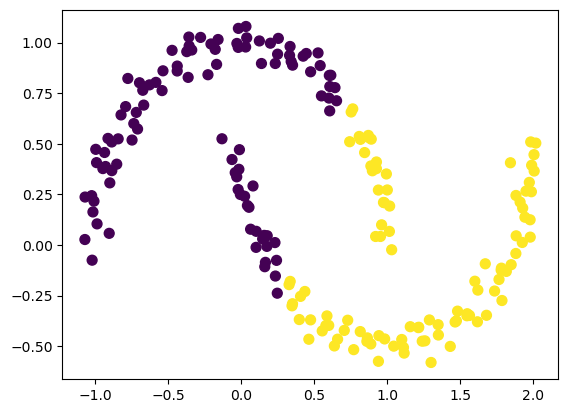

In [30]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### There is a more advanced algorithm called kernel k means that projects  the data into higher dimensions and applies kmeans in higher dimensions. Such an algorithm can deal with non-linear clusters

c:\anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


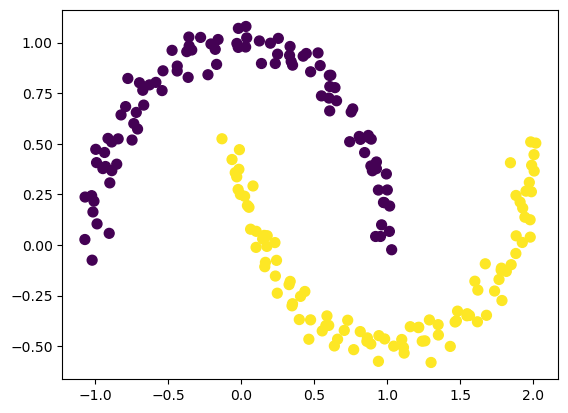

In [31]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### 2. k-means can be slow for large numbers of samples

For each iteration, kmeans has to go through the entire dataset to compute the cluster centers which can be a slow process.

There is a batch version of k-means where instead of going through the entire dataset, the algorithm uses a subset of the data to update the cluster center.

For more info look at ['sklearn.cluster.MiniBatchKMeans'](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html)


#### 3. K means is very sensitive to outliers. An alternative method is to use a model based clustering approach such as mixture of gaussian distributions

# Introduction to PCA - Clustering the wine dataset

In [32]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
X = wine.drop(columns = "quality")

In [34]:
X_std = StandardScaler().fit_transform(X)

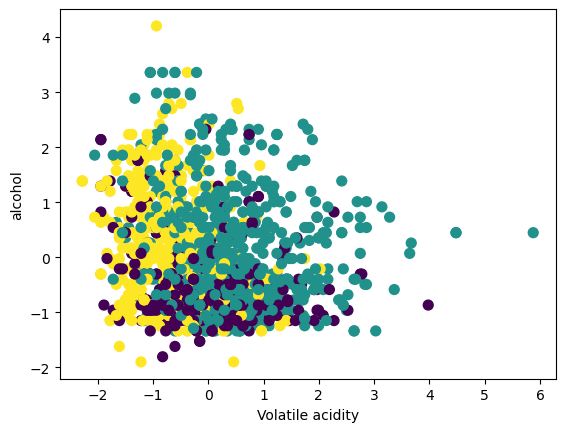

In [35]:
labels = KMeans(3, random_state=0).fit_predict(X_std)
plt.scatter(X_std[:,1], X_std[:,10], c=labels,
            s=50, cmap='viridis');
plt.xlabel('Volatile acidity')
plt.ylabel('alcohol')
plt.show()

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [38]:
principalDf.head()

,principal component 1,principal component 2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950


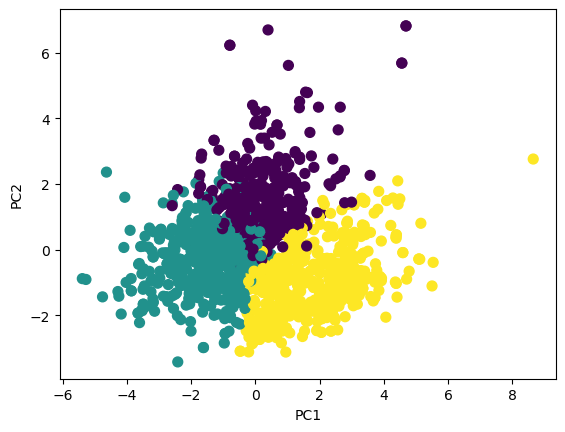

In [39]:
labels = KMeans(3, random_state=0).fit_predict(X_std)
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels,
            s=50, cmap='viridis');
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [40]:
# creating the elbow plot

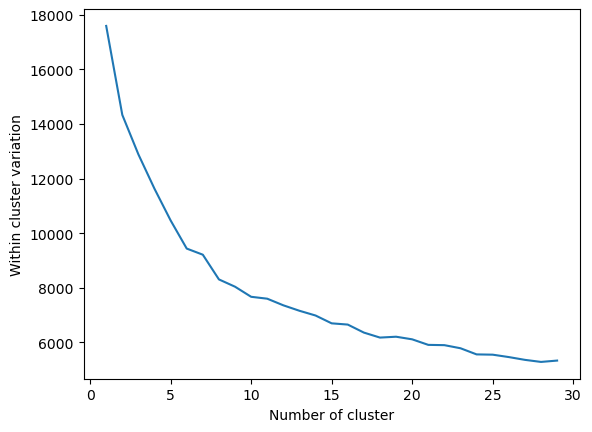

In [41]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_std)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Within cluster variation")
plt.show()

In [42]:
# Visualizing the effect of different starting points on the clusters

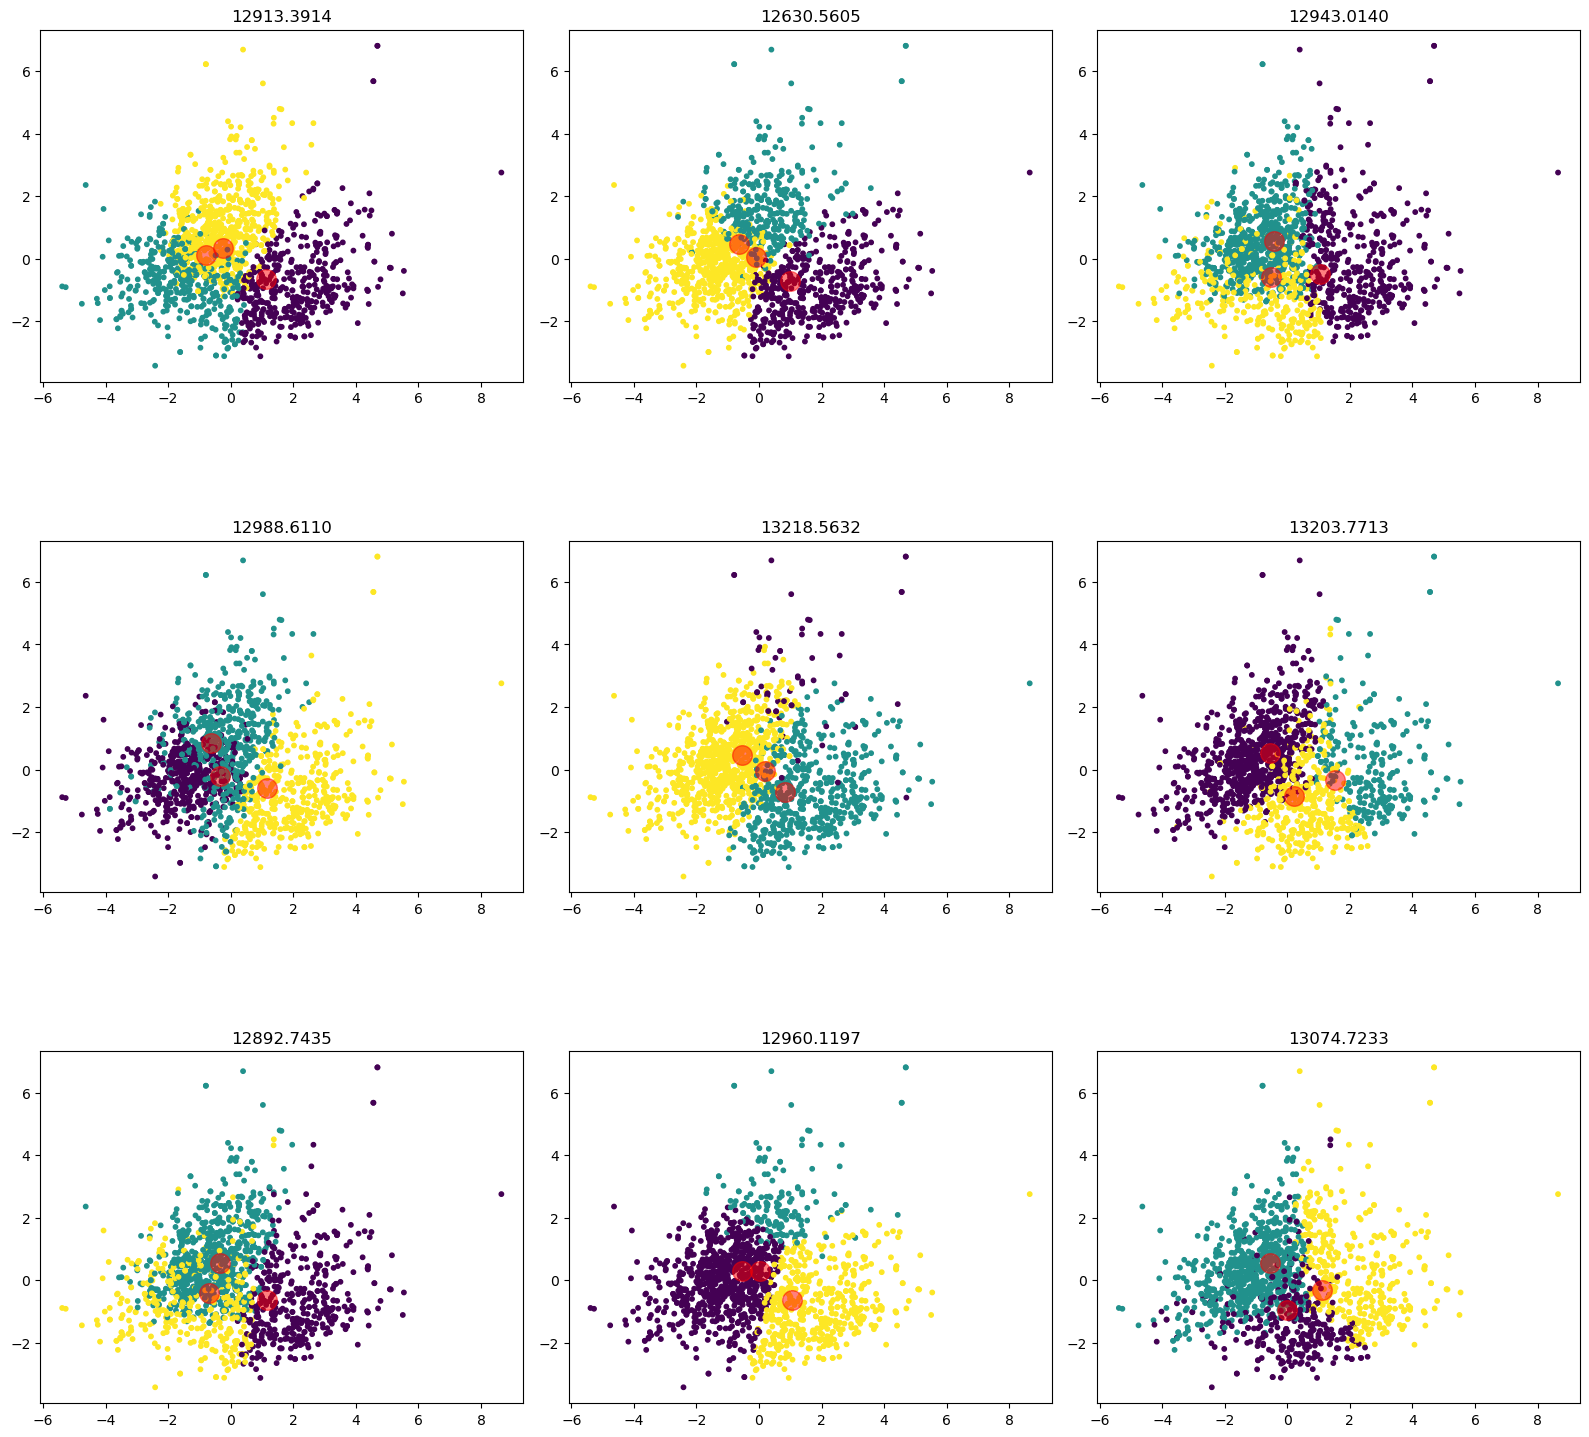

In [ ]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    km = KMeans(n_clusters=3, random_state=np.random.RandomState(), max_iter =5)
    km.fit(X_std)
    y_kmeans = km.predict(X_std)
    
    ax[i].scatter(principalComponents[:,0], principalComponents[:,1], c=y_kmeans, s=10,cmap = "viridis")
    centers = km.cluster_centers_
    ax[i].scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha = 0.5);
    ax[i].set_title(f'{km.inertia_:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();